
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name: Hope Knopf
### UTEID: hk23735

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

(b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

#### (a)

mse = 6455.708


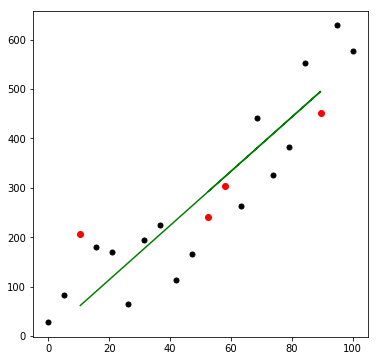

In [2]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

lr = lm.LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
#ax.plot(x, y, '--k')
ax.plot(x_test, y_pred, 'g')
ax.plot(x_test, y_test, 'or')
ax.plot(x_train, y_train, 'ok', ms=5)
print('mse = %.3f' % mse)


#### (b)

Degree 1 mse = 6455.708
Degree 2 mse = 4683.310
Degree 3 mse = 4602.203
Degree 5 mse = 6599.133


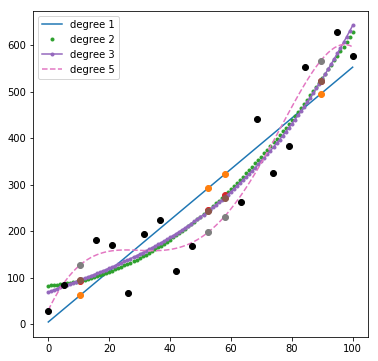

In [3]:
degs = [1, 2, 3, 5]
plot_styles = ['-', '.', '.-', '--']
point_colors = ['blue', 'orange', 'red', 'black']
lrp = lm.LinearRegression()
x_all = np.linspace(0,100,101)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
for deg, plot_style, point_color in zip(degs, plot_styles, point_colors):
    lrp.fit(np.vander(np.squeeze(x_train), deg+1), y_train)
    y_pred = lrp.predict(np.vander(np.squeeze(x_test), deg+1))
    y_all = lrp.predict(np.vander(np.squeeze(x_all), deg+1))
    mse = mean_squared_error(y_test, y_pred)
    ax.plot(x_all, y_all, plot_style, label='degree %d' % deg)
    ax.plot(x_test, y_pred, 'o')
    ax.legend(loc=2)
    print('Degree %d mse = %.3f' % (deg, mse))
ax.plot(x_train, y_train, 'ok')

#### (c)

#### Polynomical of degree 3 performed best. Higher degress polynomial models have increased complexity, so they'll have lower bias but higher variance.
#### Our first degree linear regression is less complex but has higher bias.  Higher degress polynomial is better because the error is lower, but it depends on the problem you are solving and if the higher variance will be in issue for that problem


# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

#### (a)

In [16]:
data.shape

(200, 4)

In [17]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### (b)

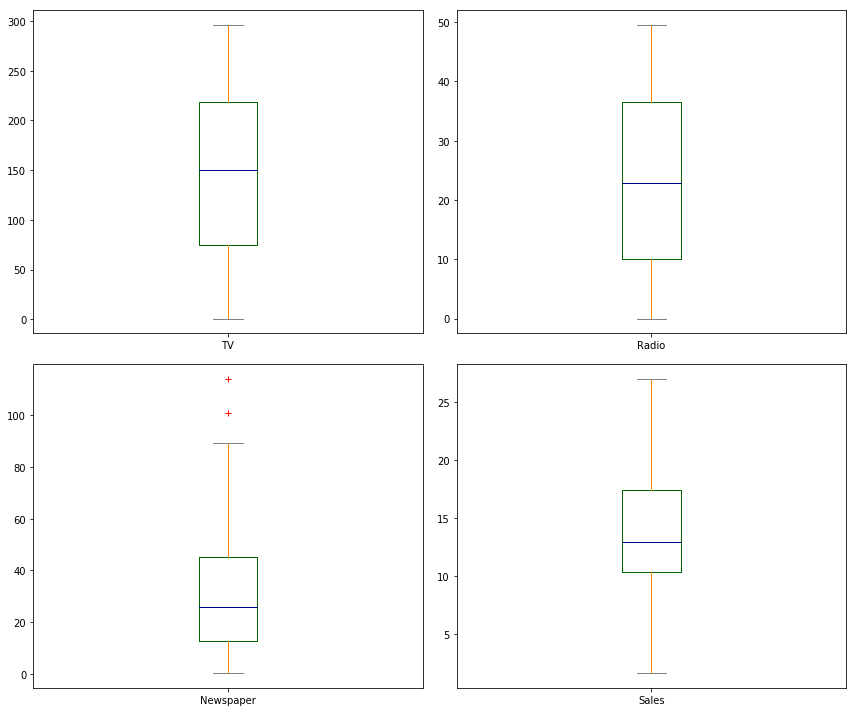

In [18]:
#generate box plots for each of the 4 columns

fig = plt.figure(figsize=(12,10))
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
fig.add_subplot(2,2,1)
data['TV'].plot.box(color=color, sym='r+')

fig.add_subplot(2,2,2)
data['Radio'].plot.box(color=color, sym='r+')

fig.add_subplot(2,2,3)
data['Newspaper'].plot.box(color=color, sym='r+')

fig.add_subplot(2,2,4)
data['Sales'].plot.box(color=color, sym='r+')
plt.tight_layout()
plt.show()

In [19]:
#identify cutoff values for outliers 

#define function to calculate outliers 
def calc_outlier(frame, column):
    df = frame.describe()
    outlier1 =df[column][4] -((df[column][6]- df[column][4])*1.5)
    outlier2 = df[column][6] +((df[column][6]- df[column][4])*1.5)
    return '<1.5 IQR below 1st Q =',round(outlier1),'>1.5 IQR above 3rd Q =',round(outlier2)
    
print ('TV Outlier Cutoff: ', calc_outlier(data, 'TV'))
print ('Radio Outlier Cutoff: ', calc_outlier(data, 'Radio'))
print ('Newspaper Outlier Cutoff: ', calc_outlier(data, 'Newspaper'))
print ('Sales Outlier Cutoff: ', calc_outlier(data, 'Sales'))

TV Outlier Cutoff:  ('<1.5 IQR below 1st Q =', -142.0, '>1.5 IQR above 3rd Q =', 436.0)
Radio Outlier Cutoff:  ('<1.5 IQR below 1st Q =', -30.0, '>1.5 IQR above 3rd Q =', 76.0)
Newspaper Outlier Cutoff:  ('<1.5 IQR below 1st Q =', -36.0, '>1.5 IQR above 3rd Q =', 94.0)
Sales Outlier Cutoff:  ('<1.5 IQR below 1st Q =', -0.0, '>1.5 IQR above 3rd Q =', 28.0)


#### (c)

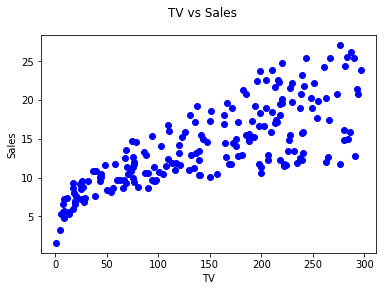

In [20]:
#Scatter plot for TV vs Sales
x_tv = data['TV']
y = data['Sales']

fig=plt.figure()
fig.suptitle('TV vs Sales')
ax=fig.add_subplot(111)
ax.scatter(x_tv, y, color='blue')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

#### There is a positive linear relationship between Sales and advertising dollars spent on TV for a single product

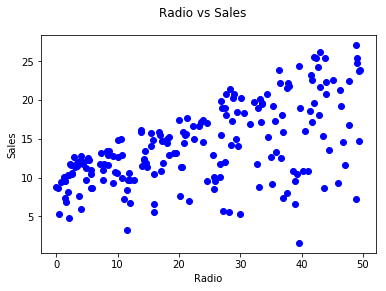

In [21]:
#scatter plot Radio vs Sales 
x_radio = data['Radio']
y = data['Sales']

fig=plt.figure()
fig.suptitle('Radio vs Sales')
ax=fig.add_subplot(111)
ax.scatter(x_radio, y, color='blue')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

#### The relationship between Sales and advertising dollars spent on Radio is slightly positive, but less linear than the plot for TV.

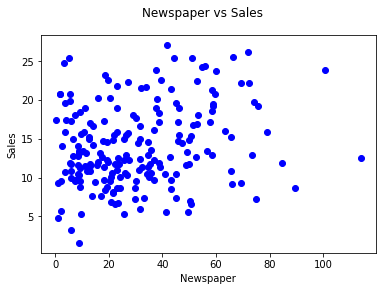

In [22]:
#Scatter plot Newspaper vs Sales
x_newspaper = data['Newspaper']
y = data['Sales']

fig=plt.figure()
fig.suptitle('Newspaper vs Sales')
ax=fig.add_subplot(111)
ax.scatter(x_newspaper, y, color='blue')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

#### There is not a significant correlation between Sales and advertising dollars spent on newspaper for a single product.

#### (d)

In [23]:
#Fit a simple linear regression of 'Sales' on 'TV'
#What is the regression coefficient for 'TV'? What is its interpretation?

In [24]:
import statsmodels.api as sm 
y, X = dmatrices('Sales ~ TV', data=data, return_type='dataframe')
lm = linear_model.LinearRegression()
result = lm.fit(X,y)

In [25]:
print('The regression coefficent is ', result.coef_)

The regression coefficent is  [[0.         0.04753664]]


#### Interpretation of this is for every thousand dollar increase in advertising dollars spent on TV, there is a widget increase of 47.5

Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

(f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

(g) (1pts) Report the coefficients obtained by your model.

In [26]:
#split into train and test 

Y, X = dmatrices('Sales ~ TV + Radio + Newspaper', data=data, return_type='dataframe')

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, random_state=42)

#### (e)

In [27]:
#fit a MLR on all feature variables using training data 

model = linear_model.LinearRegression()
fit=model.fit(X_train, Y_train)

In [28]:
#evaluate using RMSE
y_pred = model.predict(X_train)
print('The in sample root mean squared error is ', np.sqrt(mean_squared_error(Y_train, y_pred)))

y_pred_test = model.predict(X_test)
print('The out of sample root mean squared error is ', np.sqrt(mean_squared_error(Y_test, y_pred_test)))

The in sample root mean squared error is  1.5526939990087727
The out of sample root mean squared error is  1.9307843822347208


#### (f)

In [29]:
#evaluate using MSE
y_pred = model.predict(X_train)
print('The in sample mean squared error is ', mean_squared_error(Y_train, y_pred))

y_pred_test = model.predict(X_test)
print('The out of sample mean squared error is ', mean_squared_error(Y_test, y_pred_test))

The in sample mean squared error is  2.4108586545578548
The out of sample mean squared error is  3.7279283306815123


#### MSE increases from 2.4 to 3.7 when model is scored on test data

#### (g)

In [30]:
model.coef_

array([[0.        , 0.04466512, 0.19663006, 0.00607439]])

# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [31]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

/Users/hopeknopf/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

b)  (3 points) Now fit the regression model using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

c) (2 points ) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

e) (5 points) Calaculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

#### (a)

In [33]:
#fitting MLR on all features using training data
from sklearn import linear_model
from sklearn import metrics
lm = linear_model.LinearRegression()
result = lm.fit(X_train, y_train)

In [34]:
#RMSE X_train
from sklearn.metrics import mean_squared_error
 
y_pred = lm.predict(X_train)
print('The in sample root mean squared error is ', np.sqrt(mean_squared_error(y_train, y_pred)))

The in sample root mean squared error is  52.007732294217874


In [35]:
#RMSE X_test
y_test_pred = lm.predict(X_test)
print('The out of sample root mean squared error is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The out of sample root mean squared error is  57.428059772853565


#### RMSE increases slightly out of sample 

#### (b)

In [36]:
#fit regression model using Huber loss 
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

In [37]:
#fit model to train data
huber = HuberRegressor(alpha=0.0)
model = huber.fit(X_train, y_train)


In [38]:
#RMSE X_train 
y_pred_huber = huber.predict(X_train)
print('The root mean squared error is ', np.sqrt(mean_squared_error(y_train, y_pred_huber)))

The root mean squared error is  52.1635703926353


In [39]:
#RMSE X_test
y_test_pred_huber = huber.predict(X_test)
print('The root mean squared error is ', np.sqrt(mean_squared_error(y_test, y_test_pred_huber)))

The root mean squared error is  57.15005047098842


#### (c)

In [40]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0

In [41]:
#Fit the MLR model on X_train and y_train_outliers
lm = linear_model.LinearRegression()
result = lm.fit(X_train, y_train_outliers)


In [42]:
#RMSE X_train
y_pred3 = lm.predict(X_train)
print('The in sample root mean squared error is ', np.sqrt(mean_squared_error(y_train_outliers, y_pred3)))

The in sample root mean squared error is  286.26410306560086


In [43]:
#RMSE X_test
y_test_pred3 = lm.predict(X_test)
print('The out of smaple root mean squared error is ', np.sqrt(mean_squared_error(y_test, y_test_pred3)))

The out of smaple root mean squared error is  82.21820407137498


#### (d)

In [44]:
#fit regression model with Huber loss on X train and y train outliers
huber = HuberRegressor(alpha=0.0)
model = huber.fit(X_train, y_train_outliers)


In [45]:
#RMSE X_train 
y_pred_huber2 = huber.predict(X_train)
print('The in sample root mean squared error is ', np.sqrt(mean_squared_error(y_train_outliers, y_pred_huber2)))

The in sample root mean squared error is  290.22238400718453


In [46]:
#RMSE X_test
y_test_pred_huber2 = huber.predict(X_test)
print('The out of sample root mean squared error is ', np.sqrt(mean_squared_error(y_test, y_test_pred_huber2)))

The out of sample root mean squared error is  57.56638282322018


#### In sample error increased dramatically when outliers were introduced.  Huber loss brought the in sample error up slightly from the regular regression, but brought out of sample error down significantly

#### (e)

In [47]:
#Calaculate the residuals on the test set for both the models obtained in (c) and (d). 

residuals_outlier = (y_test_pred3-y_test) #residuals for model (c)
residuals_huber = (y_test_pred_huber2-y_test) #residuals for model (d)


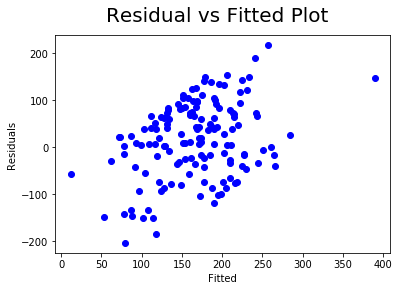

In [48]:
#Plot the scatter plot of residual vs fitted value for (c)
fig=plt.figure()
fig.suptitle('Residual vs Fitted Plot', fontsize=20)
ax=fig.add_subplot(111)
ax.scatter(y_test_pred3, residuals_outlier, color='blue')

plt.xlabel('Fitted')
plt.ylabel('Residuals')

plt.show()

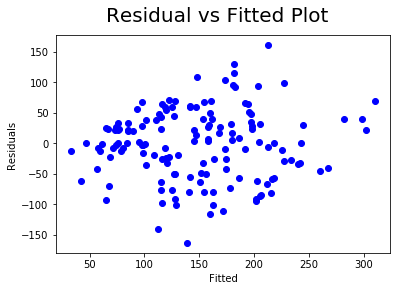

In [49]:
#Plot the scatter plot of residual vs fitted value for (d)
fig=plt.figure()
fig.suptitle('Residual vs Fitted Plot', fontsize=20)
ax=fig.add_subplot(111)
ax.scatter(y_test_pred_huber2, residuals_huber, color='blue')

plt.xlabel('Fitted')
plt.ylabel('Residuals')

plt.show()

#### The residual plot for (c) , which was normal regression with outliers introduced, looks more clustered.  The plor for (d), which was huber loss, is more spread out.  Huber loss is the better model when outliers were introduced to this data 

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.

g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

In [50]:
feature_name = ['x'+str(i) for i in range(1,11)]
print(feature_name)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']


#### (f)

In [51]:
#find 3 most significant factors using backward feature selection using X_train & y_train
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [52]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X_train, y_train)
mask=selector.support_ 
pd.Series(feature_name)[mask]

2    x3
3    x4
8    x9
dtype: object

#### (g)

In [53]:
#find 3 most significant feautures using forward selection using X_train and y_train
#MLXTEND or F regression?

In [55]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import accuracy_score as acc

clf = linear_model.LinearRegression()
sfs1 = sfs(clf,
           k_features=3,
           forward=True,
           floating=False,
           verbose=2,
           cv=0)

sfs1 = sfs1.fit(X_train, y_train, custom_feature_names=feature_name)
sfs1.subsets_

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2018-10-02 19:30:49] Features: 1/3 -- score: 0.3513795412944841[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2018-10-02 19:30:49] Features: 2/3 -- score: 0.45817009746186665[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2018-10-02 19:30:49] Features: 3/3 -- score: 0.47823646178073276

{1: {'feature_idx': (2,),
  'cv_scores': array([0.35137954]),
  'avg_score': 0.3513795412944841,
  'feature_names': ('x3',)},
 2: {'feature_idx': (2, 8),
  'cv_scores': array([0.4581701]),
  'avg_score': 0.45817009746186665,
  'feature_names': ('x3', 'x9')},
 3: {'feature_idx': (2, 4, 8),
  'cv_scores': array([0.47823646]),
  'avg_score': 0.47823646178073276,
  'feature_names': ('x3', 'x5', 'x9')}}

#### In backward feature selection we got x3, x4, and x9 and in forward feature selection we got x3, x5, and x9 so one of significant features changed.

# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Answer

#### (a)

$$
\begin{align}
{n}  \ge {p(1-p) * \left( {\frac{z_{\alpha / 2}}{\epsilon}} \right)^2 } \\
\\
 \ge {0.3(1-0.3) * \left( {\frac{z_{0.1 / 2}}{0.09}} \right)^2 } \\
\\
\ge {0.3(0.7) * \left( {\frac{z_{0.05}}{0.09}} \right)^2 } \\
\\
 \ge {0.21 * \left( {\frac{1.645}{0.09}} \right)^2 } \\
\\
{n} 
\ge {70}
\end{align}
$$

#### Necessary sample size is 70

#### (b)

$$
\begin{align}
{n}  \ge {p(1-p) * \left( {\frac{z_{\alpha / 2}}{\epsilon}} \right)^2 } \\
\\
 \ge {0.3(1-0.3) * \left( {\frac{z_{0.05 / 2}}{0.09}} \right)^2 } \\
\\
\ge {0.3(0.7) * \left( {\frac{z_{0.025}}{0.09}} \right)^2 } \\
\\
 \ge {0.21 * \left( {\frac{1.96}{0.09}} \right)^2 } \\
\\
{n}  \ge {100}
\end{align}
$$


#### Necessary sample size grows to 100 when confidence interval increases to 95%

#### (c)

$$
\begin{align}
{n}  \ge {p(1-p) * \left( {\frac{z_{\alpha / 2}}{\epsilon}} \right)^2 } \\
\\
 \ge {0.5(1-0.5) * \left( {\frac{z_{0.05 / 2}}{0.09}} \right)^2 } \\
\\
 \ge {0.5(0.5) * \left( {\frac{z_{0.025}}{0.09}} \right)^2 } \\
\\
 \ge {0.25 * \left( {\frac{1.96}{0.09}} \right)^2 } \\
\\
{n} \ge {119}
\end{align}
$$


####  In a worst case scenario of p=0.5, we want a sample size of 119

# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [56]:
import pandas as pd

df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)

(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

(d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

#### (a)

In [58]:
from sklearn.decomposition import PCA

/Users/hopeknopf/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'PC2')

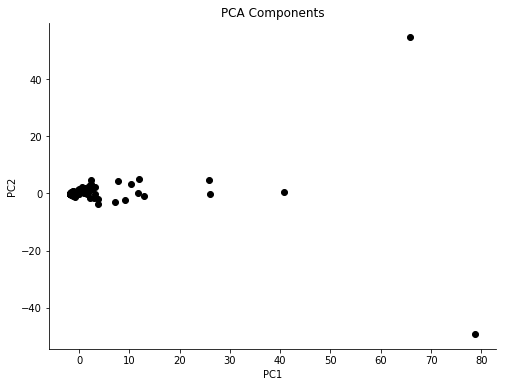

In [59]:
# PCA for top 2 components 
pca = PCA(n_components=142)
pca.fit = pca.fit(df_scaled)

varex=pca.explained_variance_ratio_
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))

# transform original data so that each row is a country and each column is a principal component
pca_transform = pca.transform(df_scaled)
# store the first component into X list
pc1 = [item[0] for item in pca_transform]
# store the second component into Y list
pc2 = [item[1] for item in pca_transform]
# country names
countries = [country for country in df.index.values]

# plot
plt.figure(figsize=(8, 6)) 
plt.scatter(pc1, pc2, color='black')

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.title("PCA Components")
plt.xlabel("PC1")
plt.ylabel("PC2")

#### (b)

In [60]:
#Find the names of the six countries with the highest first component (these should be clear outliers).

#assigning index to country and sorting by score of each country
x_index = sorted(list(enumerate(pc1)),key=lambda tup: tup[1],reverse=True)

for index, item in x_index[:6]:
    print (countries[index])

China
Canada
Mexico
Japan
Germany
Italy


#### 6 outliers are China, Mexico, Canada, Japan, Germany, & Italy

#### (c)

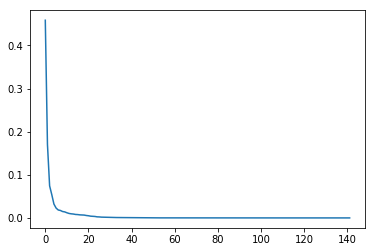

In [61]:
#scree plot depicting the proportion of variance explained by principal components 


plt.plot(pca.explained_variance_ratio_)
plt.show()

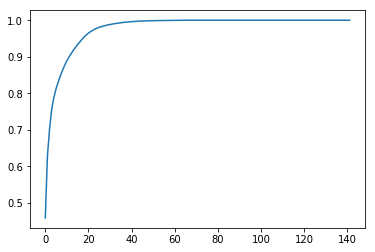

In [62]:
#scree plot depicting cumulative proportion of variance explained by the principal components 
plt.plot(var)


####  (d)

In [63]:
#define a function to find principal components required to explain cumulative variance 
def find_closest(A, target):
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A)-1)
    left = A[idx-1]
    right = A[idx]
    idx -= target - left < right - target
    return idx

#apply function and print results 
var30 = find_closest(var, 0.3) + 1
var60 = find_closest(var, 0.6) + 1
var90 = find_closest(var, 0.9) + 1
print ("30% explained with", var30, "components")
print ("60% explained with", var60, "components")
print ("90% explained with", var90, "components")

30% explained with 1 components
60% explained with 2 components
90% explained with 12 components


# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

#### (a)
We might want to use PCA to reduce dimensions and data redunancy while retaining information about the original data.  Another reason to use PCA is to get a good visualization of data that captures variation and patterns in the data. 

#### (b)
The eigenvectors represent the principal lines of force or directions of the feature space and the eigenvalues are the coefficients attached to the eigenvectors. 